In [43]:
deps <- c("ISLR", "ndjson", "ggplot2", "dplyr", "caret", "tidyr", "gridExtra", "data.table", "repr", "reshape2", "grid", "ggpubr", "patchwork", "cowplot")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}
options(scipen=999)

df <- ndjson::stream_in("./self_ensemble.jsonl")
# print(names(df))

df <- df %>%
    filter(dataset == "cifar10") # cifar10, cifar100, imagenette

# plain

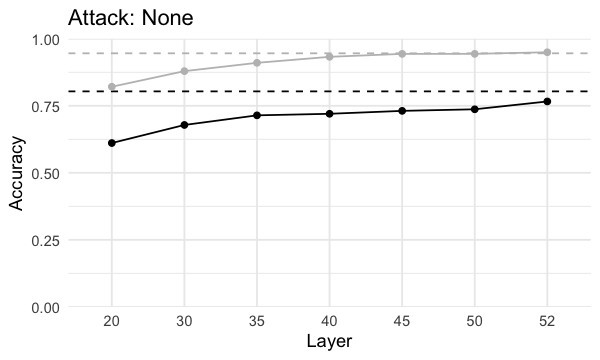

In [44]:
options(repr.plot.width=5, repr.plot.height=3)


description <- "Attack: None"
acc_cols <- c("plain_layer_accs.20", "plain_layer_accs.30", "plain_layer_accs.35", "plain_layer_accs.40", "plain_layer_accs.45", "plain_layer_accs.50", "plain_layer_accs.52")
acc_ensemble <- "plain_ensemble_acc"

ggplot() +
    # adv training
    geom_line(data = melt(df[df$training_natural == TRUE], measure.vars = acc_cols), aes(x = variable, y = value, group = 1), color = "black") +
    geom_point(data = melt(df[df$training_natural == TRUE], measure.vars = acc_cols), aes(x = variable, y = value), color = "black") +
    geom_hline(yintercept = df[[acc_ensemble]][2], color = "black", linetype = "dashed", linewidth = 0.5) +
    # no adv training
    geom_line(data = melt(df[df$training_natural == FALSE], measure.vars = acc_cols), aes(x = variable, y = value, group = 1), color = "gray") +
    geom_point(data = melt(df[df$training_natural == FALSE], measure.vars = acc_cols), aes(x = variable, y = value), color = "gray") +    
    geom_hline(yintercept = df[[acc_ensemble]][1], color = "gray", linetype = "dashed", linewidth = 0.5) +
    ggtitle(description) +
    xlab("Layer") +
    ylab("Accuracy") +
    theme_minimal() +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 1)) + # limit y range
    scale_x_discrete(labels = function(x) sub(".*\\.", "", x)) # show only layer number on x-axis

# fgsm vs. pgd

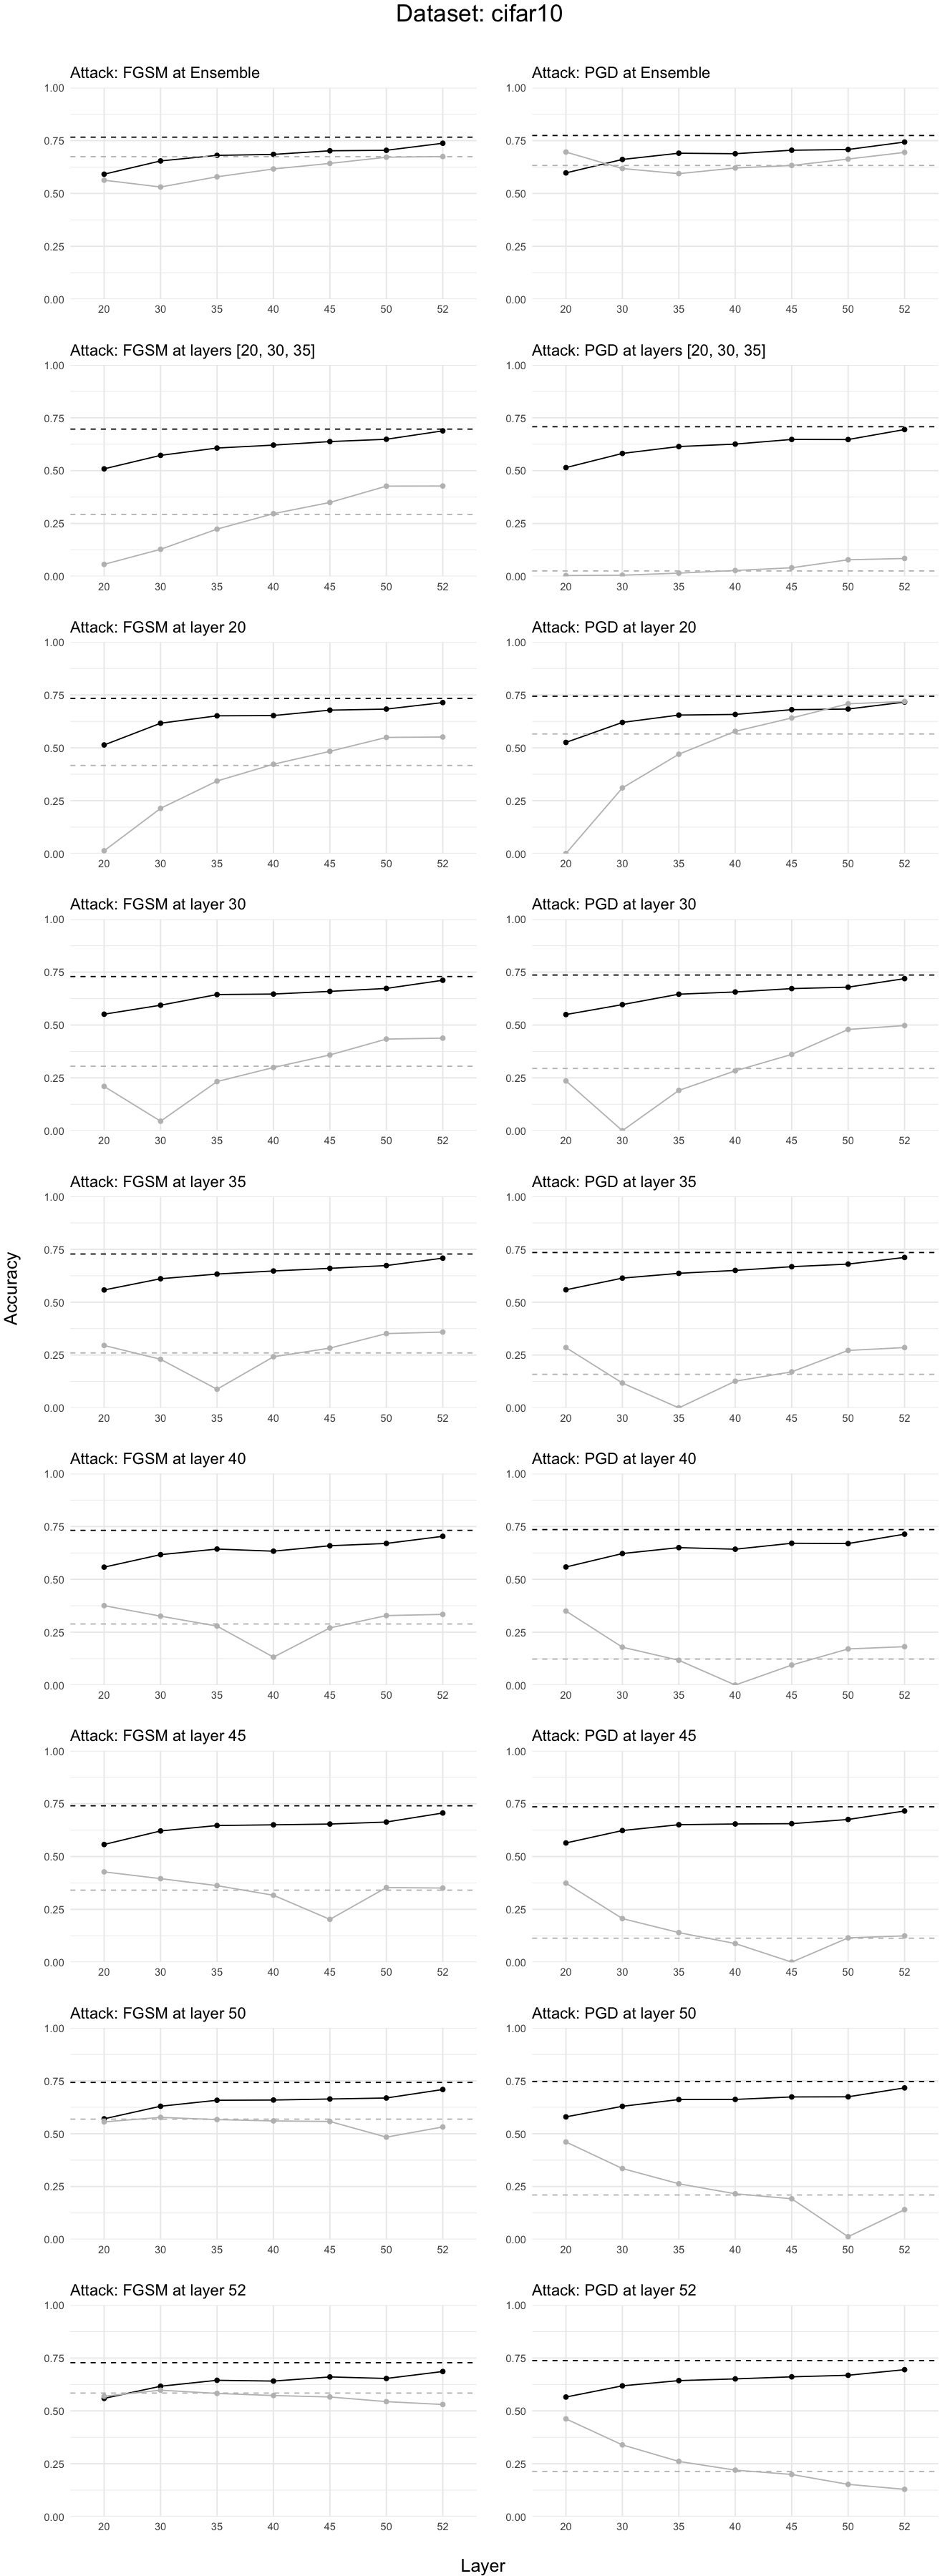

In [46]:
options(repr.plot.width=11, repr.plot.height=30)

get_plot <- function(description, acc_cols, acc_ensemble) {
    p <- ggplot() +
        # adv training
        geom_line(data = melt(df[df$training_natural == TRUE], measure.vars = acc_cols), aes(x = variable, y = value, group = 1), color = "black") +
        geom_point(data = melt(df[df$training_natural == TRUE], measure.vars = acc_cols), aes(x = variable, y = value), color = "black") +
        geom_hline(yintercept = df[[acc_ensemble]][2], color = "black", linetype = "dashed", linewidth = 0.5) +
        # no adv training
        geom_line(data = melt(df[df$training_natural == FALSE], measure.vars = acc_cols), aes(x = variable, y = value, group = 1), color = "gray") +
        geom_point(data = melt(df[df$training_natural == FALSE], measure.vars = acc_cols), aes(x = variable, y = value), color = "gray") +    
        geom_hline(yintercept = df[[acc_ensemble]][1], color = "gray", linetype = "dashed", linewidth = 0.5) +
        ggtitle(description) +
        xlab("") +
        ylab("") +
        theme_minimal() +
        scale_y_continuous(expand = c(0, 0), limits = c(0, 1)) + # limit y range
        scale_x_discrete(labels = function(x) sub(".*\\.", "", x)) # show only layer number on x-axis
    
    return(p)
}

plot_list <- list()

description <- "Attack: FGSM at Ensemble"
acc_cols <- c("fgsmensemble_layer_accs.20", "fgsmensemble_layer_accs.30", "fgsmensemble_layer_accs.35", "fgsmensemble_layer_accs.40", "fgsmensemble_layer_accs.45", "fgsmensemble_layer_accs.50", "fgsmensemble_layer_accs.52")
acc_ensemble <- "fgsmensemble_ensemble_acc"
p1 <- get_plot(description, acc_cols, acc_ensemble)

description <- "Attack: PGD at Ensemble"
acc_cols <- c("pgdensemble_layer_accs.20", "pgdensemble_layer_accs.30", "pgdensemble_layer_accs.35", "pgdensemble_layer_accs.40", "pgdensemble_layer_accs.45", "pgdensemble_layer_accs.50", "pgdensemble_layer_accs.52")
acc_ensemble <- "pgdensemble_ensemble_acc"
p2 <- get_plot(description, acc_cols, acc_ensemble)

plot_list[[1]] <- p1
plot_list[[2]] <- p2

description <- "Attack: FGSM at layers [20, 30, 35]"
acc_cols <- c("fgsmcombined_[20, 30, 35]_layer_accs.20", "fgsmcombined_[20, 30, 35]_layer_accs.30", "fgsmcombined_[20, 30, 35]_layer_accs.35", "fgsmcombined_[20, 30, 35]_layer_accs.40", "fgsmcombined_[20, 30, 35]_layer_accs.45", "fgsmcombined_[20, 30, 35]_layer_accs.50", "fgsmcombined_[20, 30, 35]_layer_accs.52")
acc_ensemble <- "fgsmcombined_[20, 30, 35]_ensemble_acc"
p1 <- get_plot(description, acc_cols, acc_ensemble)

description <- "Attack: PGD at layers [20, 30, 35]"
acc_cols <- c("pgdcombined_[20, 30, 35]_layer_accs.20", "pgdcombined_[20, 30, 35]_layer_accs.30", "pgdcombined_[20, 30, 35]_layer_accs.35", "pgdcombined_[20, 30, 35]_layer_accs.40", "pgdcombined_[20, 30, 35]_layer_accs.45", "pgdcombined_[20, 30, 35]_layer_accs.50", "pgdcombined_[20, 30, 35]_layer_accs.52")
acc_ensemble <- "pgdcombined_[20, 30, 35]_ensemble_acc"
p2 <- get_plot(description, acc_cols, acc_ensemble)

plot_list[[3]] <- p1
plot_list[[4]] <- p2

layers <- c(20, 30, 35, 40, 45, 50, 52)
for (layer in layers) {
    description <- paste("Attack: FGSM at layer", layer)
    acc_cols <- c(paste("fgsm_", layer, "_layer_accs.20", sep=""), paste("fgsm_", layer, "_layer_accs.30", sep=""), paste("fgsm_", layer, "_layer_accs.35", sep=""), paste("fgsm_", layer, "_layer_accs.40", sep=""), paste("fgsm_", layer, "_layer_accs.45", sep=""), paste("fgsm_", layer, "_layer_accs.50", sep=""), paste("fgsm_", layer, "_layer_accs.52", sep=""))
    acc_ensemble <- paste("fgsm_", layer, "_ensemble_acc", sep="")
    p1 <- get_plot(description, acc_cols, acc_ensemble)
    
    description <- paste("Attack: PGD at layer", layer)
    acc_cols <- c(paste("pgd_", layer, "_layer_accs.20", sep=""), paste("pgd_", layer, "_layer_accs.30", sep=""), paste("pgd_", layer, "_layer_accs.35", sep=""), paste("pgd_", layer, "_layer_accs.40", sep=""), paste("pgd_", layer, "_layer_accs.45", sep=""), paste("pgd_", layer, "_layer_accs.50", sep=""), paste("pgd_", layer, "_layer_accs.52", sep=""))
    acc_ensemble <- paste("pgd_", layer, "_ensemble_acc", sep="")
    p2 <- get_plot(description, acc_cols, acc_ensemble)

    plot_list[[length(plot_list) + 1]] <- p1
    plot_list[[length(plot_list) + 1]] <- p2
}

ds <- df$dataset[1]
grid.arrange(
    grobs = plot_list, 
    ncol = 2,
    top = textGrob(paste("Dataset:", ds, "\n"), gp = gpar(fontsize = 20)),
    bottom = textGrob("Layer", gp = gpar(fontsize = 15)),
    left = textGrob("Accuracy", gp = gpar(fontsize = 15), rot = 90),
)

# masks

`summarise()` has grouped output by 'mask_per_rowcol'. You can override using
the `.groups` argument.


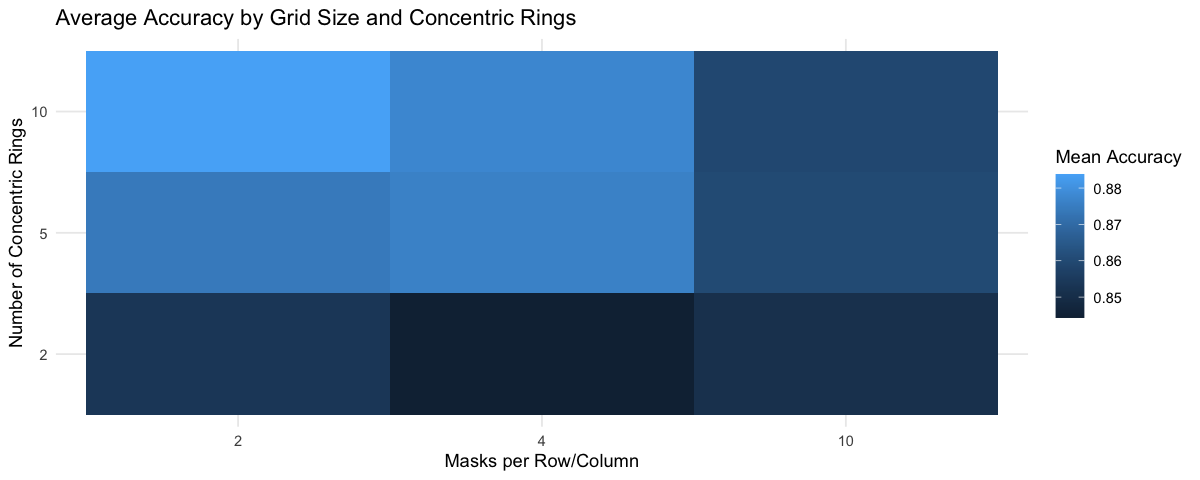

`geom_smooth()` using formula = 'y ~ x'


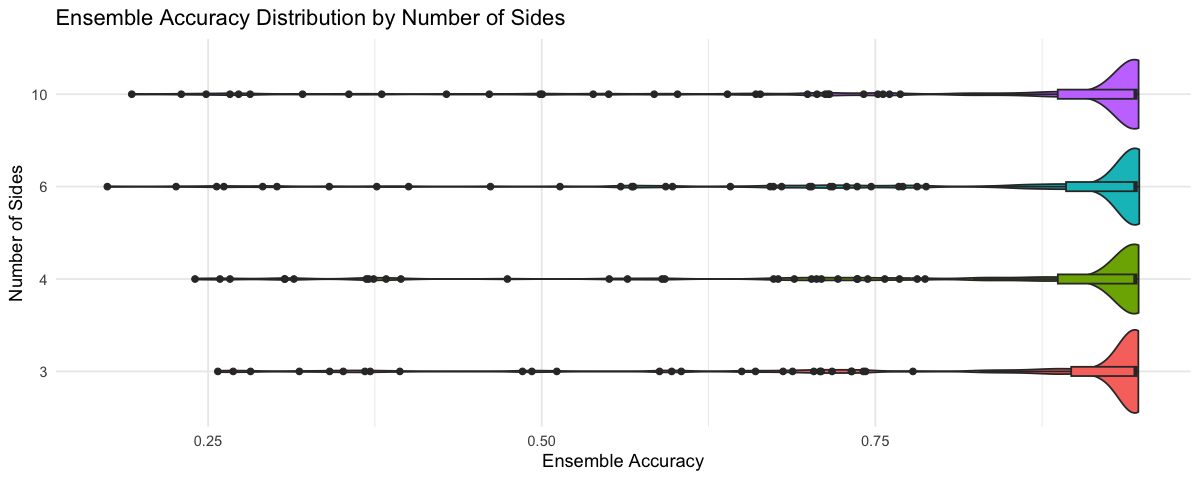

`geom_smooth()` using formula = 'y ~ x'


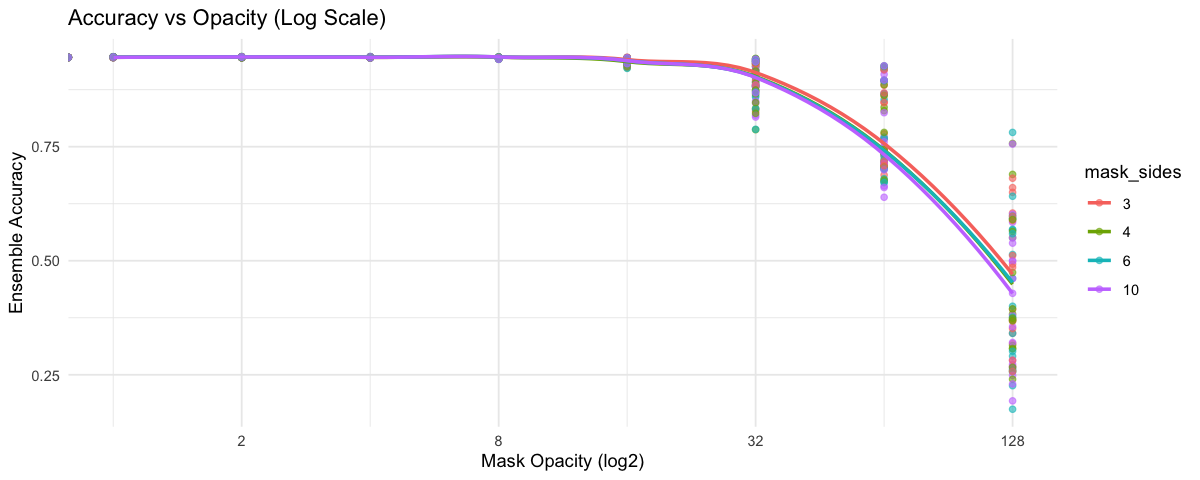

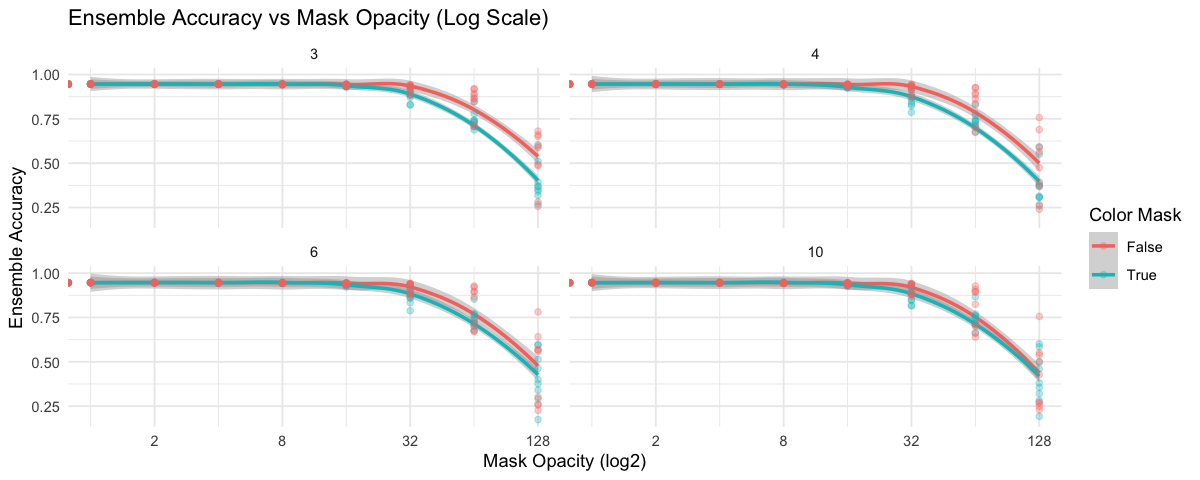

In [4]:
options(repr.plot.width=10, repr.plot.height=4)
options(warn=-1)

mask_opacities <- c(0, 1, 2, 4, 8, 16, 32, 64, 128)
mask_sides <- c(3, 4, 6, 10)
mask_per_rowcols <- c(2, 4, 10)
mask_num_concentrics <- c(2, 5, 10)
mask_colors <- c(TRUE, FALSE)

combinations <- expand.grid(mask_opacities, mask_sides, mask_per_rowcols, mask_num_concentrics, mask_colors)

df_plot <- data.frame(
    mask_opacity = combinations[,1],
    mask_sides = as.factor(combinations[,2]),
    mask_per_rowcol = as.factor(combinations[,3]),
    mask_num_concentric = as.factor(combinations[,4]),
    mask_color = ifelse(combinations[,5], "True", "False"),
    ensemble_acc = sapply(1:nrow(combinations), function(i) {
        mask_opacity <- combinations[i, 1]
        mask_side <- combinations[i, 2]
        mask_per_rowcol <- combinations[i, 3]
        mask_num_concentric <- combinations[i, 4]
        mask_color <- ifelse(combinations[i, 5], "True", "False")        
        mask_name <- paste("mask", mask_opacity, mask_side, mask_per_rowcol, mask_num_concentric, mask_color, sep="_")
        return(max(df[[paste(mask_name, "_ensemble_acc", sep="")]])) # get larger ensemble acc
    })
)

# cifar10: 2 rings, 4 per rowcol is the best
df_plot %>%
    group_by(mask_per_rowcol, mask_num_concentric) %>%
    summarize(mean_acc = mean(ensemble_acc)) %>%
    ggplot(aes(x = mask_per_rowcol, y = mask_num_concentric, fill = mean_acc)) +
    geom_tile() +
    theme_minimal() +
    labs(title = "Average Accuracy by Grid Size and Concentric Rings",
        x = "Masks per Row/Column",
        y = "Number of Concentric Rings",
        fill = "Mean Accuracy")

# cifar10: side number doesn't matter
ggplot(df_plot, aes(x=ensemble_acc, y=mask_sides, fill=mask_sides)) +
    geom_violin() +
    geom_boxplot(width=0.1) +
    theme_minimal() +
    labs(title="Ensemble Accuracy Distribution by Number of Sides",
        x="Ensemble Accuracy",
        y="Number of Sides") +
    theme(legend.position="none")

# cifar10: opacity stars working from 32
ggplot(df_plot, aes(x=mask_opacity, y=ensemble_acc, color=mask_sides)) +
    geom_point(alpha=0.6) +
    geom_smooth(method="loess", se=FALSE) +
    scale_x_continuous(trans='log2') +
    theme_minimal() +
    labs(title="Accuracy vs Opacity (Log Scale)",
        x="Mask Opacity (log2)",
        y="Ensemble Accuracy")

# cifar10: color=true is a lot better
ggplot(df_plot, aes(x = mask_opacity, y = ensemble_acc, color = mask_color)) +
    geom_smooth(method = "loess") +
    geom_point(alpha = 0.3) +
    facet_wrap(~mask_sides) +
    scale_x_continuous(trans='log2') +
    theme_minimal() +
    labs(title = "Ensemble Accuracy vs Mask Opacity (Log Scale)",
             x = "Mask Opacity (log2)",
             y = "Ensemble Accuracy",
             color = "Color Mask")


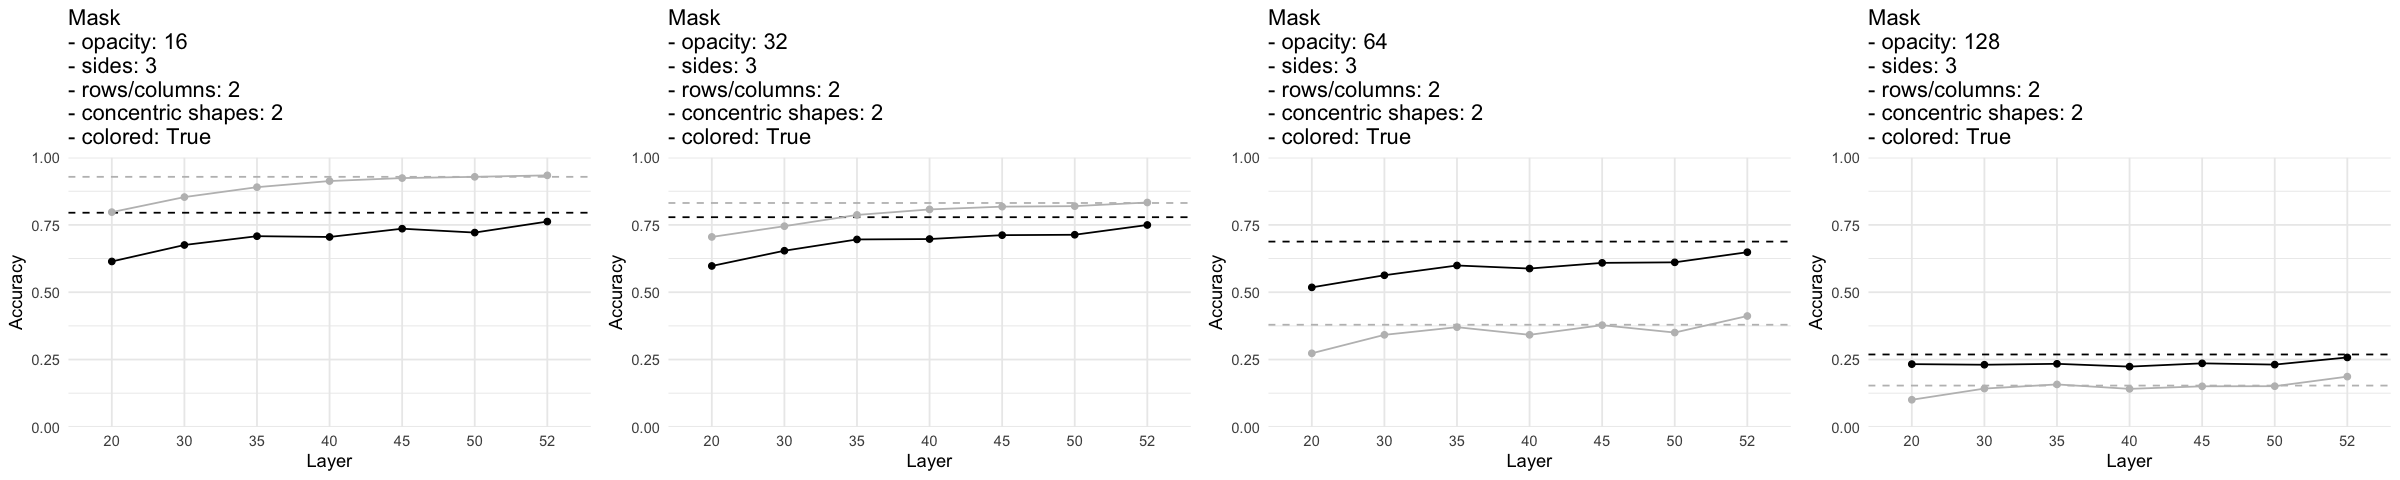

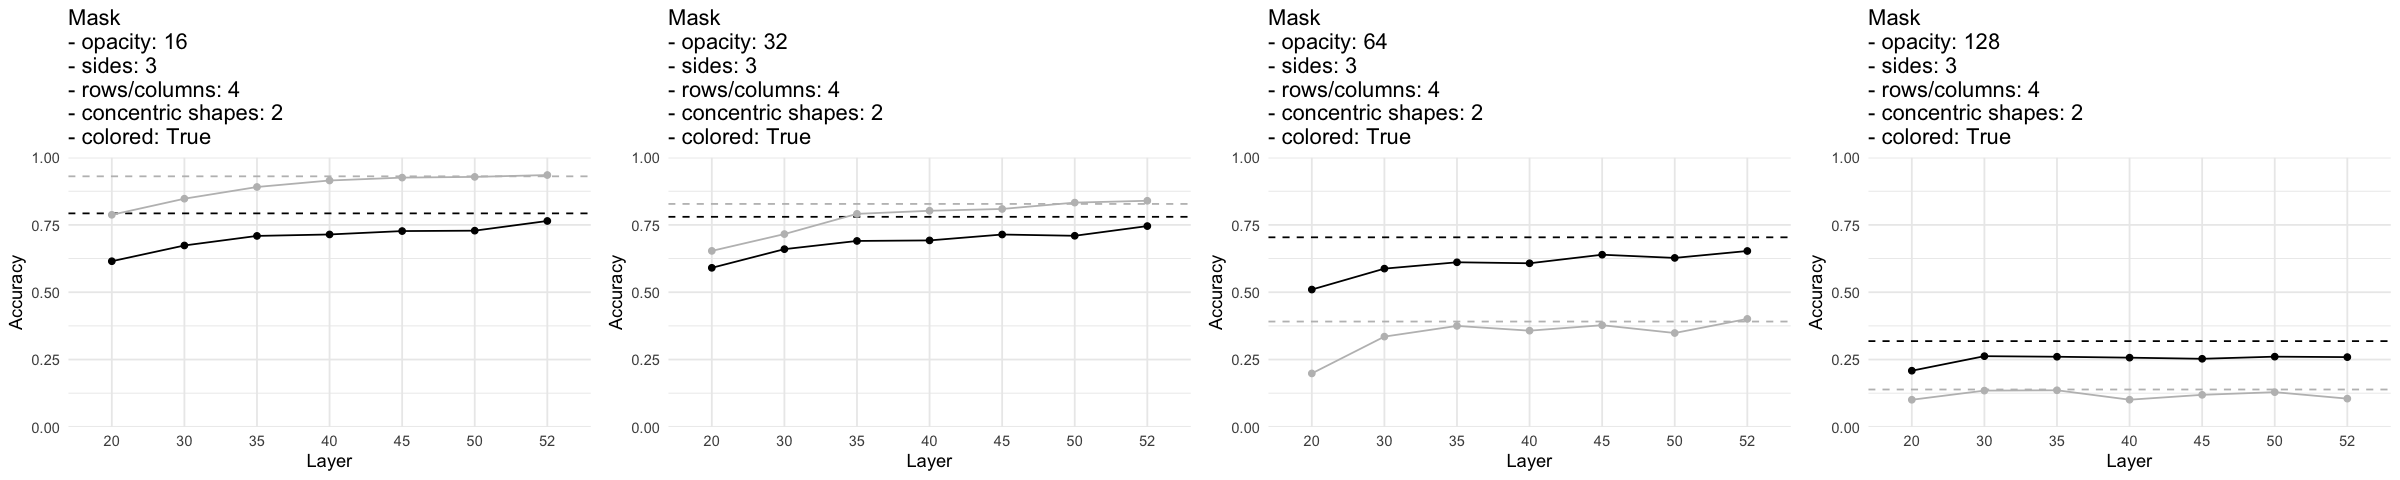

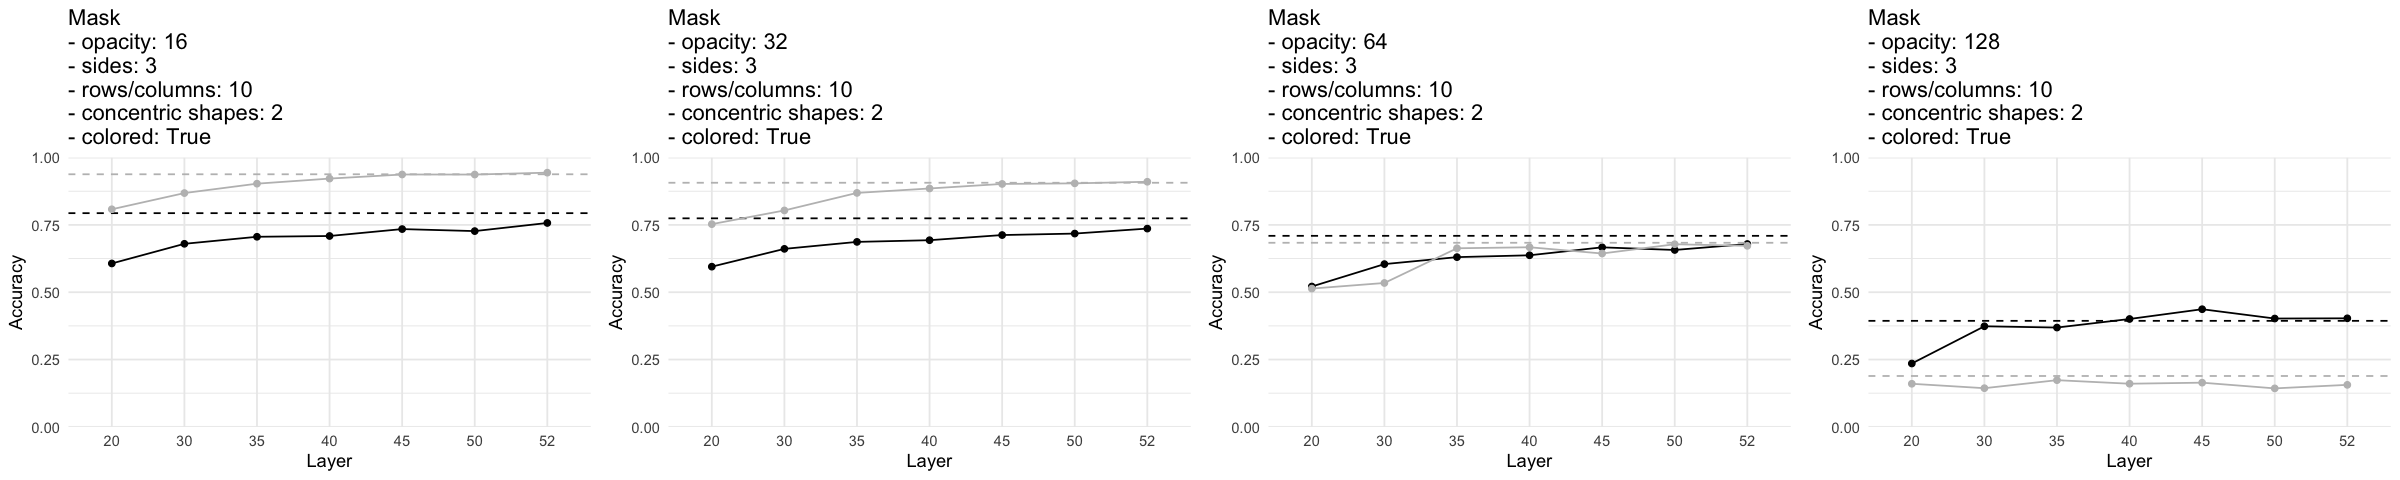

In [5]:
# taking a closer look at individual layers based on findings above

options(repr.plot.width=20, repr.plot.height=4)


# mask_opacities <- c(0, 1, 2, 4, 8, 16, 32, 64, 128)
# mask_sides <- c(3, 4, 6, 10)
# mask_per_rowcols <- c(2, 4, 10)
# mask_num_concentrics <- c(2, 5, 10)
# mask_colors <- c(TRUE, FALSE)

mask_sides <- c(3) # small difference
mask_per_rowcols <- c(2, 4, 10) # huge difference
mask_num_concentrics <- c(2) # no difference
mask_colors <- c(TRUE) # huge difference

combinations <- expand.grid(mask_sides, mask_per_rowcols, mask_num_concentrics, mask_colors)
for (i in 1:nrow(combinations)) {
    mask_opacities <- c(16, 32, 64, 128)
    
    plots <- list()
    for (mask_opacity in mask_opacities) {
        mask_side <- combinations[i, 1]
        mask_per_rowcol <- combinations[i, 2]
        mask_num_concentric <- combinations[i, 3]
        mask_color <- ifelse(combinations[i, 4], "True", "False")
        
        description <- paste("Mask\n- opacity:", mask_opacity, "\n- sides:", mask_side, "\n- rows/columns:", mask_per_rowcol, "\n- concentric shapes:", mask_num_concentric, "\n- colored:", mask_color)
        mask_name <- paste("mask", mask_opacity, mask_side, mask_per_rowcol, mask_num_concentric, mask_color, sep="_")

        acc_cols <- c(paste(mask_name, "_layer_accs.20", sep=""), paste(mask_name, "_layer_accs.30", sep=""), paste(mask_name, "_layer_accs.35", sep=""), paste(mask_name, "_layer_accs.40", sep=""), paste(mask_name, "_layer_accs.45", sep=""), paste(mask_name, "_layer_accs.50", sep=""), paste(mask_name, "_layer_accs.52", sep=""))
        acc_ensemble <- paste(mask_name, "_ensemble_acc", sep="")
        
        p <- get_plot(description, acc_cols, acc_ensemble)
        
        plots <- c(plots, list(p))
    }
    
    grid.arrange(grobs = plots, ncol = 4)
}

# latent shift

we want to show how much classes have been "moved" by the attack

- get 100 samples from each class
- for all layers: forward to layer, then dump latents instead of linear probe -> stack latents for all images
- repeat also with perturbed images (masks)

plot:

- make tsne / umap plot
- only fit to unperturbed images, not to perturbed images: https://umap-learn.readthedocs.io/en/latest/transform.html
- use color/shape to encode whether they're perturbed/unperturbed and the class
